In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Fonctions de transfert harmoniques

## Les filtres

La notion de filtre est au centre d’un très grand nombre d’applications, notamment en communications, en contrôle et en traitement du signal. Ce document présente une notion très importante sur les filtres analogiques: leur fonction de transfert harmonique. L’idée principale que l’on veut dégager ici est qu’un filtre analogique linéaire (de type circuit RLC) peut être vu comme un simple diviseur de tension si le signal d’entrée est une sinusoïde pure; le gain du filtre (de même que son déphasage) va dépendre de la fréquence de la sinusoïde d’entrée.

Un filtre peut être décrit simplement comme une boîte fonctionnelle qui prend un signal en entrée, disons $x(t)$, et qui donne un autre signal en sortie, disons $y(t)$. 

<img src="Images/04_FiltreBoiteNoire.png" width="480px" height="400px">

Un des filtres analogiques les plus simples à réaliser est le diviseur de tension : 

<img src="Images/04_DivTension.png" width="400px" height="360px">

Ici, $x(t)$ est le voltage en entrée, $y(t)$ le voltage de sortie, et la relation entrée-sortie est simplement

$$y(t) = \frac{R_2}{R_1 + R_2} x(t)$$

Dans ce cas particulier (et trivial), le gain est indépendant de la fréquence du signal (la relation entrée-sortie ne fait pas apparaître la fréquence). On remarquera aussi que le gain de ce filtre simple est nécessairement inférieur à 1.

## Notions de fonction de transfert harmonique

Prenons maintenant le cas (plus intéressant) d’un circuit RC d’ordre 1 :

<img src="Images/04_DivTensionRC.png" width="400px" height="360px">

On peut montrer facilement dans ce cas que la relation entrée-sortie est l’équation différentielle suivante :

$$ RC \frac{dy(t)}{dt} + y(t) = x(t) $$

(Retrouvez cette équation en observant que le courant dans le condensateur doit être égal au courant à travers la résistance.) On ne peut donc pas écrire explicitement $y(t)$ en fonction de $x(t)$, puisque des différentielles apparaissent dans l’équation.

Par contre, imaginez que le signal (voltage) d’entrée soit

$$x(t) = \mathrm{e}^{j\omega t} $$

Cette exponentielle complexe, par le théorème d’Euler, est égale à la somme d’un cosinus et d’un sinus de fréquence $\omega$. On peut donc dire que c’est “comme si” on avait une sinusoïde pure. Puisque la dérivée d’une exponentielle (complexe ou non) donne la même exponentielle multipliée par un gain, la solution de l’équation différentielle se trouve en posant

$$ y(t) = H\mathrm{e}^{j\omega t} $$

et en cherchant la valeur de $H$ qui satisfait l’équation différentielle. On verra dans quelques lignes que $H$ dépend de la fréquence $\omega$. En remplaçant $x(t)$ et $y(t)$ dans l’équation différentielle, on obtient

$$ RC \frac{d\left( H\mathrm{e}^{j\omega t}\right)}{dt} +  H\mathrm{e}^{j\omega t} =  \mathrm{e}^{j\omega t} $$

Et puisque $H$ ne dépend pas de $t$, on a

$$ RCH \frac{d\left( \mathrm{e}^{j\omega t}\right)}{dt} +  H\mathrm{e}^{j\omega t} =  \mathrm{e}^{j\omega t} $$

ce qui donne

$$ RCH \left(j\omega\mathrm{e}^{j\omega t}\right) +  H\mathrm{e}^{j\omega t} =  \mathrm{e}^{j\omega t} $$

(Attention: lorsqu’on dérive l’exponentielle complexe par rapport à $t$, on se retrouve avec le facteur $j\omega$ devant l’exponentielle.) Puisque l’exponentielle complexe se retrouve dans chaque terme de l’équation, on peut diviser partout par cette exponentielle, et on se retrouve avec l’équation suivante:

$$j\omega RCH + H = 1$$

En isolant H, on obtient finalement

$$ H = \frac{1}{j\omega RC+1} $$

On remarque que: 1) $H$ dépend de la fréquence $\omega$, et 2) $H$ est complexe. Pour bien indiquer ceci, on va écrire plutôt

$$ H(j\omega) = \frac{1}{j\omega RC+1} $$

Cette fonction $H(j\omega$) est ce qu’on appelle la **fonction de transfert harmonique** du circuit RC.

A quoi ça sert, dites-vous? Rappelez-vous comment nous avons posé le problème: en supposant que pour le circuit RC suivant

<a class="anchor" name="DivTensionRC"></a>
<img src="Images/04_DivTensionRC.png" width="400px" height="360px">

le voltage d’entrée est donné par

>$x(t) = \mathrm{e}^{j\omega t} $

on a observé que le voltage de sortie doit avoir la forme

>$ y(t) = H\mathrm{e}^{j\omega t} $

et nous venons de déterminer que, pour ce circuit,

>$ H (j\omega) = \frac{1}{j\omega RC+1} $

On obtient donc la sortie en multipliant l’entrée par $H(j\omega$), qui est un nombre complexe ayant un module et une phase, qui vont dépendre de la fréquence. On imagine aisément que si le module de $H(j\omega$) est élevé à une fréquence  donnée, alors le gain du filtre à cette fréquence sera élevé. Par contre, si à une autre fréquence le module de $H(j\omega$) est petit, alors le gain du circuit à cette fréquence sera d’autant plus petit.

Evidemment, travailler avec des fonctions temporelles complexes ne nous facilite pas la tâche. Faisons donc un pas de plus. Comme un circuit RC est un système linéaire (sa relation entrée-sortie est une équation différentielle linéaire), la réponse à une somme d’entrées sera égale à la somme des réponses individuelles. Quelle sera donc la réponse du circuit RC montré ci-haut lorsque l’entrée $x(t)$ est donnée par 

>$x(t) = 2\cos(\omega t) = \mathrm{e}^{j \omega t} +\mathrm{e}^{-j \omega t}

Pour solutionner, on va donc faire comme si on avait d’abord $x_1(t)$ en entrée, puis $x_2(t)$, et on va additionner les deux réponses $y_1(t)$ et $y_2(t)$ correspondantes, où

>$\begin{aligned} & x_1(t) = \mathrm{e}^{j \omega t} \\  & x_2(t) = \mathrm{e}^{-j \omega t} \\ & y_1(t) = H_1 \mathrm{e}^{j \omega t} \\ & y_2(t) = H_2 \mathrm{e}^{j \omega t} \end{aligned}$


On a déjà solutionné l’équation pour $x_1(t)$. On a trouvé

>$ y(t) = H\mathrm{e}^{j\omega t} $

avec

>$ H_1 (j\omega) = \frac{1}{j\omega RC+1} $

Maintenant, pour solutionner l’équation avec $x_2(t)$, on emploie la même procédure. On remplace d’abord $x(t)$ et $y(t)$ dans l’équation différentielle par $x_2(t)$ et $y_2(t)$ définits ci-haut:

>$ RC \frac{d\left( H_2 \mathrm{e}^{-j\omega t}\right)}{dt} +  H_2 \mathrm{e}^{-j\omega t} =  \mathrm{e}^{-j\omega t} $

Puis, en appliquant la dérivée et en isolant H2, on obtient

>$ H_2 (j\omega) = \frac{1}{-j\omega RC+1} $

(Notez que $ H_2 (j\omega)$ ne porte pas le nom de fonction de transfert harmonique puisque l’entrée n’est pas $\mathrm{e}^{j\omega t}$.)

Ainsi, lorsqu’on applique le voltage d’entrée suivant au circuit RC

>$x(t) = 2\cos(\omega t) = \mathrm{e}^{j \omega t} +\mathrm{e}^{-j \omega t}

on obtient en sortie le signal (voltage) suivant (somme des réponses)

>$y(t) = H_1 \mathrm{e}^{j\omega t} + H_2 \mathrm{e}^{-j\omega t} $

En remplaçant $H_1(j\omega)$ et $H_2(j\omega$) par leur expression donnée à la page précédente, on obtient la réponse

>$y(t) = \frac{1}{j\omega RC+1} \mathrm{e}^{j\omega t} + \frac{1}{-j\omega RC+1} \mathrm{e}^{-j\omega t} $

Oui, mais, on avait un beau cosinus simple en entrée du circuit RC, et là, vous nous donnez un signal de sortie $y(t)$ que nous ne serions même pas en mesure de tracer sur un graphique. OK. Alors suivez bien la suite et la fin du raisonnement, qui va nous donner une solution facile à digérer avec **en bonus** une piste pour généraliser tout ça à d’autres circuits que le circuit RC simple étudié ici.

Donc, dans l’équation pour $y(t)$ ci-dessus, on remarque une chose extrêmement intéressante: la fonction $H_2(j\omega)$ qui multiplie $\mathrm{e}^{-j\omega t}$ est le complexe conjugué de la fonction $H_1(j\omega)$ qui multiplie $\mathrm{e}^{j\omega t}$. Le complexe conjugué d’un nombre s’obtient toujours en remplaçant tous les $j$ par des $–j$, ce que nous avons ici. Si on définit les fonctions complexes $H_1(j\omega)$ et $H_2(j\omega)$ en forme polaire, i.e. en fonction de leur module et de leur phase, on a donc

>$H_1(j\omega) = A(\omega)\mathrm{e}^{j\phi(\omega}$

>$H_2(j\omega) = A(\omega)\mathrm{e}^{-j\phi(\omega}$

avec

$$ A (\omega) = \frac{1}{\sqrt{(\omega RC)^2 + 1}} \quad \quad \phi (\omega) = -\arctan(\omega RC)$$

(Revoir vos notes sur les nombres complexes si nécessaire).

On peut maintenant remplacer $H_1(j\omega)$ et $H_2(j\omega)$ par leur expression en forme polaire dans l’expression de $y(t)$, ce qui donne

$$ \begin{aligned} y(t) & = H_1 \mathrm{e}^{j\omega t} + H_2 \mathrm{e}^{-j\omega t} \\ & = A(\omega) \mathrm{e}^{j\phi} \mathrm{e}^{j\omega t} + A(\omega) \mathrm{e}^{-j\phi} \mathrm{e}^{-j\omega t} \\ & = A(\omega) \mathrm{e}^{j(\omega t + \phi)} + A(\omega) \mathrm{e}^{-j(\omega t +\phi)} \\ & = 2A(\omega) \cos(\omega t + \phi) \end{aligned} $$

Avouez que ça a valu la peine de suivre la discussion jusqu’ici. On a bien maintenant en sortie un cosinus de même fréquence $\omega$ qu’en entrée, mais multiplié par un gain $A(\omega) $ et déphasé de $\phi(\omega)$ radians. Graphiquement (notez qu’on a divisé l’entrée et la sortie par un facteur 2 – comme le filtre est linéaire, diviser par deux l’entrée implique que la sortie est aussi divisée par 2) :

<img src="Images/04_Filtre_Cos.png" width="480px" height="400px">

où $A$ et $\phi$ dépendent de la fréquence $\omega$ de la sinusoïde d’entrée. Pour le circuit RC analysé depuis le début de ce chapitre, le gain $A$ et la phase $\phi$, rappelons-le, sont donnés par

$$ A (\omega) = \frac{1}{\sqrt{(\omega RC)^2 + 1}} \quad \quad \phi (\omega) = -\arctan(\omega RC)$$

Pour un autre circuit, le gain et la phase en fonction de la fréquence seront différents, mais le principe restera le même: la réponse à une sinusoïde sera une sinusoïde de même fréquence, mais d’amplitude et de phase différentes, selon le gain et le déphasage du filtre à cette fréquence, i.e. selon le module et la phase de sa fonction de transfert harmonique $H(j\omega)$.

A cette étape-ci, on pourrait bien montrer à quoi ressemblent le gain et la phase de la fonction de transfert harmonique $H(j\omega)$ de notre circuit RC. Ceux-ci dépendent (bien entendu) des valeurs données aux composantes $R$ et $C$. Prenons le cas où le produit RC = 1 (par exemple, une résistance de 1 $\mathrm{k\Omega}$ et un condensateur de 1 mF). On a alors les expressions suivantes pour le gain $A$ et la phase $\phi$:

$$ A (\omega) = \frac{1}{\sqrt{(\omega)^2 + 1}} \quad \quad \phi (\omega) = -\arctan(\omega)$$

La première figure montre le gain $A$ du filtre en fonction de la fréquence $\omega$ comprise entre 0 et 10 rad/sec. La seconde figure montre la phase $\phi$. On observe que le gain de ce circuit RC diminue à mesure que la fréquence augmente. Par exemple, une sinusoïde pure de 0.1 rad/sec en entrée apparaîtra avec pratiquement la même amplitude en sortie, alors qu’une sinusoïde de 10 rad/sec n’aura plus qu’environ 10% de son amplitude en sortie. Notez aussi que la phase est toujours nulle ou négative – une phase négative représente un retard, i.e. que la sortie est en retard sur l’entrée. Pour les très grandes fréquences, la figure ci-dessous montre que la sortie est en retard de 90 degrés par rapport à l’entrée.

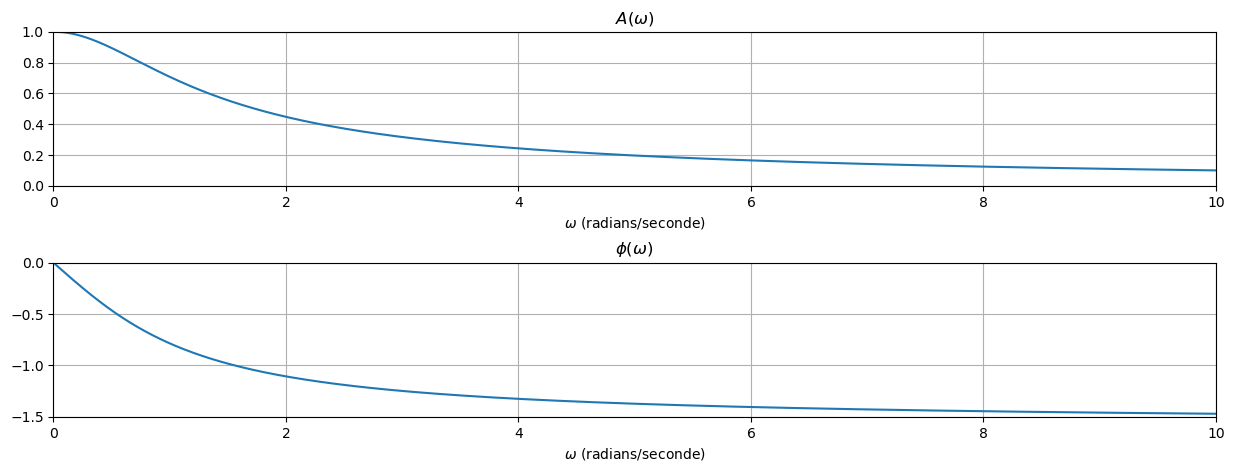

In [8]:
w = np.arange(0, 10, 0.001)
A = 1/np.sqrt((w**2)+1)
phi = -np.arctan(w)

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(5)
fig.subplots_adjust(hspace=0.5)

ax1 = plt.subplot(2,1,1)
ax1.plot(w,A)
ax1.set_title("$A(\omega)$")
ax1.set_ylim([0, 1])
ax1.set_xlim([0, 10])
ax1.set_xlabel("$\omega$ (radians/seconde)")
ax1.grid()

ax2 = plt.subplot(2,1,2)
ax2.plot(w,phi)
ax2.set_title("$\phi(\omega)$")
ax2.set_ylim([-1.5,0])
ax2.set_xlim([0, 10])
ax2.set_xlabel("$\omega$ (radians/seconde)")
ax2.grid()

       

Le filtre formé par le [réseau RC précédent](#DivTensionRC), et dont le gain en fonction de la fréquence est donné à la figure de la page 8, est de type passe-bas. Plus la fréquence est élevée, moins il laisse passer le signal. Pour obtenir un filtre passe-haut avec les mêmes composantes RC, il suffit d’interchanger la résistance R et le condensateur C. On mesure alors le voltage de sortie aux bornes de la résistance, comme dans la figure suivante :

<img src="Images/04_DivTensionCR.png" width="400px" height="360px">

Dans ce cas, la fonction de transfert harmonique se présenterait plutôt comme suit (refaites le développement pour vous en assurer) :

$$ H(j\omega) = \frac{j\omega}{j\omega RC+1} $$

Ce filtre a maintenant la caractéristique d’un filtre passe-haut, i.e. que son gain est nul lorsque $\omega = 0$, alors qu’il tend vers 1 lorsque $\omega$ tend vers l’infini.

La fréquence de coupure d’un filtre est définie comme la fréquence $\omega$ à laquelle le gain du filtre est 3 dB sous le gain de la bande passante. Une chute de gain de 3 dB (i.e. un gain de -3 dB si la gain de la bande passnte est de 0 dB) correspond à  $\frac{1}{\sqrt{2}}$. 

<div class="alert alert-block alert-warning">
<b>Attention:</b> Nous verrons d'autres "familles" de filtres plus loin dans la session qui n'ont pas tous une fréquence de coupure à 3 dB.
</div>

Prenons par exemple le filtre passe-bas du réseau [réseau RC](#DivTensionRC), dont la fonction de transfert harmonique est donnée, comme nous l’avons vu, par :

$$ H(j\omega) = \frac{1}{j\omega RC+1} $$

Le gain de ce filtre est donc :

>$ |H(j\omega)| = \frac{1}{\sqrt{(\omega RC)^2 +1}} $

La fréquence de coupure $\omega_c$c est trouvée lorsque :

>$ |H(j\omega_c)| = \frac{1}{\sqrt{(\omega_c RC)^2 +1}} = \frac{1}{\sqrt{2}}$

On a donc :

>$ (\omega_c RC)^2 +1 = 2$

Ce qui donne :

>$ (\omega_c RC)^2 = 1$
 
Et finalement, la fréquence de coupure de ce filtre est donc donnée par :

>$ \omega_c = \frac{1}{RC}$

Attention, la fréquence de coupure en Hz est donnée par :

>$ f_c = \frac{1}{2\pi RC}$

## Les impédances complexes

Pour obtenir le gain et la phase d’un filtre en fonction de la fréquence du signal d’entrée, on a donc une méthode qui consiste à déterminer la fonction de transfert harmonique $H(j\omega)$ du filtre, puis à calculer le module et la phase de cette fonction. Le module donne le gain du filtre en fonction de la fréquence, et la phase donne (eh oui) la phase du filtre.

Voyons ce que ceci implique pour les éléments du circuit eux-même (i.e. les $R$, $L$ et $C$). Chacun de ces éléments peut être décrits par sa relation VI (relation entre le voltage à ses bornes et le courant qui le traverse). Ces relations (bien connues) sont

$$ v(t) = R i(t) \quad \quad v(t) = L \frac{di(t)}{dt} \quad \quad i(t) = C \frac{dv(t)}{dt}$$

Ce sont (encore) des équations différentielles, et donc on peut les analyser dans le contexte d’une excitation sinusoïdale.

Commençons par le condensateur (nous reviendrons sur la résistance $R$). Si le voltage aux bornes du condensateur est donné par

>$v(t) = \mathrm{e}^{j\omega t}$

alors le courant qui le traverse est donné par

$$
i(t)=C \frac{d v(t)}{d t}=C \frac{d\left(e^{j \omega t}\right)}{d t}=j \omega C e^{j \omega t}=j \omega C v(t)
$$

Pour une excitation sinusoïdale, on peut donc exprimer la relation VI du condensateur comme suit

>$ v(t) = \frac{1}{j \omega C} i(t) = Z_C i(t)$

Cette quantité $Z_C = 1 / (j\omega C)$ est appelée l’impédance complexe du condensateur. Elle indique que plus la fréquence augmente, plus l’impédance du condensateur diminue (à $\omega=0$, l’impédance est infinie et à une fréquence infinie l’impédance est nulle). 

On peut faire la même analyse pour une inductance $L$. Si le courant qui traverse l’inductance est donné par

>$i(t) = \mathrm{e}^{j\omega t}$

alors le voltage à ses bornes est donné par

$$
v(t)=L \frac{d i(t)}{d t}=L \frac{d\left(e^{j \omega t}\right)}{d t}=j \omega L e^{j \omega t}=j \omega L i(t)=Z_L i(t)
$$

Ainsi, pour l’inductance, on a l’impédance complexe $Z_L = j\omega L$. L’inpédance d’une inductance augmente donc avec la fréquence (comportement inverse du condensateur).

Pour la résistance, c’est déjà trouvé, l’impédance est simplement $R$.

Que tout cela nous suggère-t-il? En considérant le cas particulier où le signal d’entrée du circuit est une exponentielle complexe (donc un sinus et un cosinus purs), on peut trouver le rapport entre la sortie et l’entrée en remplaçant les composantes $R$,$L$ et $C$ par leur impédance complexe, et en appliquant la loi du diviseur de tension. On obtient alors (eh oui) la fonction du transfert harmonique du circuit. Sans passer auparavent par son équation différentielle (une étape de moins – tant mieux!).

Faisons un premier exemple avec le circuit RC pour nous rassurer :

<img src="Images/04_DivTensionRC.png" width="400px" height="360px">


Pour une entrée sinusoïdale, le rapport entrée sortie se trouve donc en remplaçant C par l’impédance complexe $Z_C = 1 / (j\omega C)$, et en appliquant la loi du diviseur de tension. On obtient :

$$
H(j \omega)=\frac{1 / j \omega C}{R+1 / j \omega C}
$$

C’est presque la forme trouvée plus tôt. En fait, en multipliant par $j\omega_C$, on obtient le même résultat!

$$ H(j\omega) = \frac{1}{j\omega RC+1} $$

Pour montrer l’intérêt de cette approche, déterminez la fonction de transfert harmonique du circuit RLC suivant en utilisant la notion d’impédances complexes.

<img src="Images/04_Circuit_RLC.png" width="400px" height="360px">

On obtient

$$
H(j \omega)=\frac{1 / j \omega C}{j \omega L+R+1 / j \omega C}=\frac{1}{L C(j \omega)^2+j \omega R C+1}=\frac{1}{1-L C \omega^2+j \omega R C}
$$

<div class="alert alert-block alert-success">
<b>Exercice:</b> Exercez vos compétences Python en affichant le gain et la phase de cette fonction de transfert harmonique pour différentes valeurs de R, L et C – on suggère comme premier essai les valeurs R=10 Ω, L=100 mH et C=10 μF, en affichant le gain et la phase pour ω entre 0 et 2000 radians par seconde.
    
Vérifiez que vous obtenez la même fonction de transfert harmonique en utilisant la méthode montrée à la section 1.2 (i.e. déterminer d’abord l’équation différentielle qui régit la relation entrée/sortie du circuit puis remplacer x(t) par une exponentielle complexe de fréquence ω).

</div>

